In [1]:
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import scale 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.decomposition import PCA 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc
import seaborn as sns

In [2]:
data = pd.read_csv("/content/oasis_longitudinal.csv")

In [3]:
pd.set_option('display.max_columns', None) # show the all columns with pandas dataframe
pd.set_option('display.max_rows', None) # show the all rows with pandas dataframe

In [4]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1.0,0.0,M,R,87,14.0,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2.0,457.0,M,R,88,14.0,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1.0,0.0,M,R,75,12.0,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2.0,560.0,M,R,76,12.0,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3.0,1895.0,M,R,80,12.0,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
data.shape

(799, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  429 non-null    object 
 1   MRI ID      799 non-null    object 
 2   Group       383 non-null    object 
 3   Visit       798 non-null    float64
 4   MR Delay    798 non-null    float64
 5   M/F         799 non-null    object 
 6   Hand        799 non-null    object 
 7   Age         799 non-null    int64  
 8   EDUC        618 non-null    float64
 9   SES         579 non-null    float64
 10  MMSE        616 non-null    float64
 11  CDR         618 non-null    float64
 12  eTIV        799 non-null    int64  
 13  nWBV        799 non-null    float64
 14  ASF         799 non-null    float64
dtypes: float64(8), int64(2), object(5)
memory usage: 93.8+ KB


Converting Categorical Data to Numerical Data

In [7]:
data['M/F'] = [1 if each == "M" else 0 for each in data['M/F']]
data['Group'] = [1 if each == "Demented" or each == "Converted" else 0 for each in data['Group']]
# data['Group'] = data['Group'].replace(['Converted'], ['Demented']) # Target variable
# data['Group'] = data['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  429 non-null    object 
 1   MRI ID      799 non-null    object 
 2   Group       799 non-null    int64  
 3   Visit       798 non-null    float64
 4   MR Delay    798 non-null    float64
 5   M/F         799 non-null    int64  
 6   Hand        799 non-null    object 
 7   Age         799 non-null    int64  
 8   EDUC        618 non-null    float64
 9   SES         579 non-null    float64
 10  MMSE        616 non-null    float64
 11  CDR         618 non-null    float64
 12  eTIV        799 non-null    int64  
 13  nWBV        799 non-null    float64
 14  ASF         799 non-null    float64
dtypes: float64(8), int64(4), object(3)
memory usage: 93.8+ KB


Correlation Between Attributes

In [8]:
correlation_matrix = data.corr()
data_corr = correlation_matrix['Group'].sort_values(ascending=False)
data_corr

Group       1.000000
CDR         0.514553
Age         0.313192
EDUC        0.207263
M/F         0.165613
SES         0.042094
ASF         0.005099
eTIV       -0.005861
Visit      -0.045012
MR Delay   -0.061645
MMSE       -0.329389
nWBV       -0.399699
Name: Group, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f60c4d7f450>,
      dtype=object)

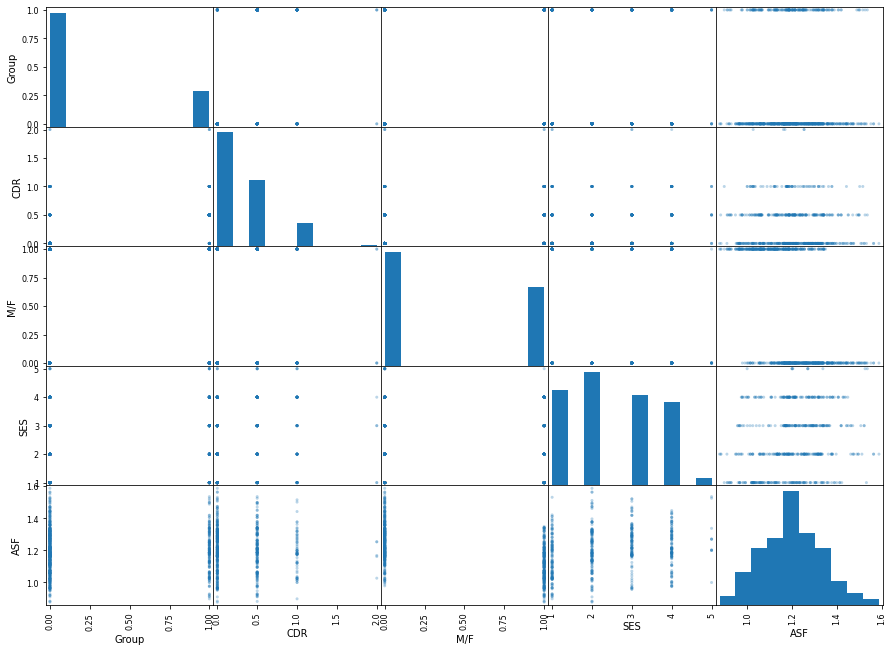

In [9]:
from pandas.plotting import scatter_matrix

attributes = ["Group", "CDR", "M/F", "SES", "ASF"]

scatter_matrix(data[attributes], figsize=(15, 11), alpha=0.3)

In [10]:
import plotly.express as px

fig = px.scatter(data, x='Group', y='SES', color='Group')
fig.show()

In [11]:
import plotly.express as px
fig = px.scatter(data, x='Group', y='Age', color='Group')
fig.show()

In [12]:
import plotly.express as px

fig = px.scatter(data, x='Group', y='ASF', color='Group')
fig.show()

Checking For Missig Values

In [13]:
data.isnull().sum()

Subject ID    370
MRI ID          0
Group           0
Visit           1
MR Delay        1
M/F             0
Hand            0
Age             0
EDUC          181
SES           220
MMSE          183
CDR           181
eTIV            0
nWBV            0
ASF             0
dtype: int64

Taking median values for the missing values

In [14]:
median = data['MMSE'].median()
data['MMSE'].fillna(median, inplace=True)
data.isnull().sum()

median = data['EDUC'].median()
data['EDUC'].fillna(median, inplace=True)
data.isnull().sum()

median = data['CDR'].median()
data['CDR'].fillna(median, inplace=True)
data.isnull().sum()

median = data['Visit'].median()
data['Visit'].fillna(median, inplace=True)
data.isnull().sum()

median = data['MR Delay'].median()
data['MR Delay'].fillna(median, inplace=True)
data.isnull().sum()

median = data['SES'].median()
data['SES'].fillna(median, inplace=True)
data.isnull().sum()

Subject ID    370
MRI ID          0
Group           0
Visit           0
MR Delay        0
M/F             0
Hand            0
Age             0
EDUC            0
SES             0
MMSE            0
CDR             0
eTIV            0
nWBV            0
ASF             0
dtype: int64

Train-Test Split

In [15]:
y = data['Group'].values
X = data[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

In [16]:
# by default test_size= 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In Training Split:
0    426
1    133
Name: 0, dtype: int64

In Testing Split:
0    184
1     56
Name: 0, dtype: int64


With Stratified Sampling

In [17]:
# by default test_size= 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=50, stratify=y)

df_ytrain = pd.DataFrame(y_train)
df_ytest = pd.DataFrame(y_test)

print('In Training Split:')
print(df_ytrain[0].value_counts())

print('\nIn Testing Split:')
print(df_ytest[0].value_counts())

In Training Split:
0    488
1    151
Name: 0, dtype: int64

In Testing Split:
0    122
1     38
Name: 0, dtype: int64


Scale the dataset

In [18]:
scaler = StandardScaler().fit(X_train)
#scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.82022855,  0.40818865,  0.06380094, ...,  0.30008944,
        -0.63100297, -0.40514452],
       [-0.82022855, -0.70230415,  0.06380094, ..., -0.76059338,
         1.36858935,  0.71893144],
       [ 1.21917239,  0.36376894,  0.77488468, ...,  1.84940144,
        -0.51033791, -1.63343944],
       ...,
       [ 1.21917239,  0.98564491, -2.78053402, ..., -0.98703129,
        -0.6654787 ,  0.98692306],
       [ 1.21917239, -0.92440271,  0.06380094, ...,  0.44906175,
         0.88592914, -0.53914033],
       [-0.82022855,  1.25216318, -2.06945028, ..., -0.58182662,
        -0.38967286,  0.5030493 ]])

In [20]:
X_train.describe()

,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000,639.000000
mean,0.402191,63.810642,12.730829,2.338028,27.555556,1485.640063,0.761606,1.196424
std,0.490724,22.530164,4.222217,0.967323,3.456804,167.947891,0.058057,0.134438
min,0.000000,18.000000,1.000000,1.000000,4.000000,1106.000000,0.644000,0.876000
25%,0.000000,51.500000,12.000000,2.000000,27.000000,1360.500000,0.715000,1.105000
50%,0.000000,72.000000,13.000000,2.000000,29.000000,1475.000000,0.754000,1.190000
75%,1.000000,80.000000,15.000000,3.000000,29.000000,1586.500000,0.813000,1.291000
max,1.000000,98.000000,23.000000,5.000000,30.000000,2004.000000,0.893000,1.587000


Data Visualization

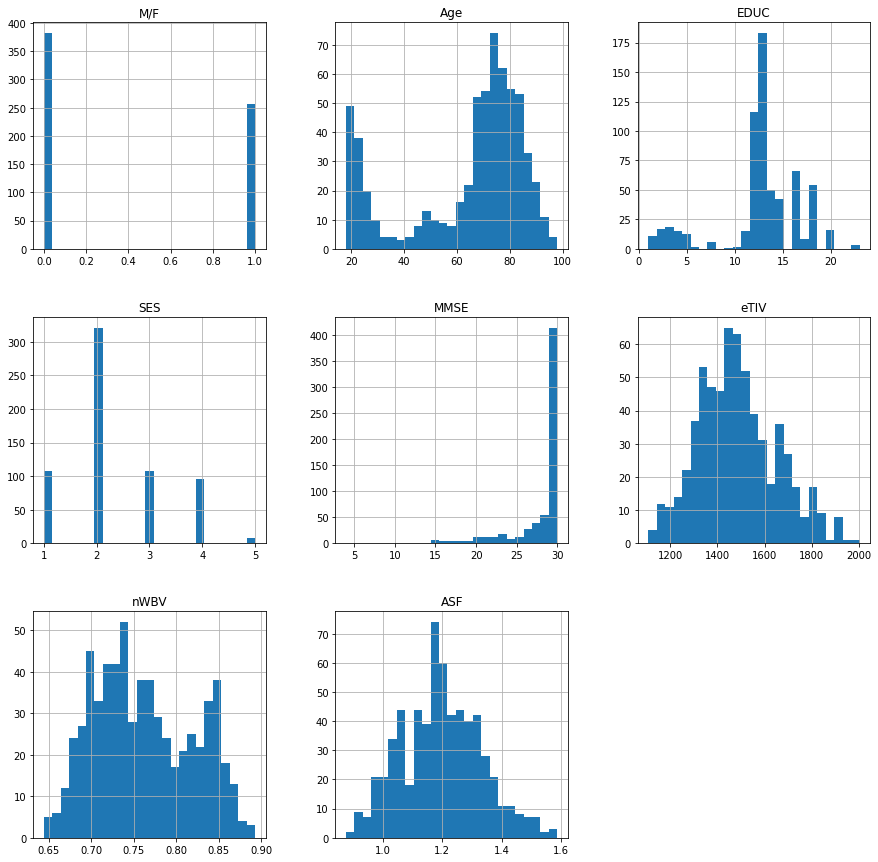

In [21]:
X_train.hist(bins=25, figsize=(15,15))
plt.show()

In [22]:
import plotly.express as px

x = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']
fig = px.histogram(X_train, x='eTIV', nbins=10)
fig.show()

In [23]:
import plotly.express as px

x = ['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']

fig = px.scatter(X_train, x='eTIV')
fig.show()

SVM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



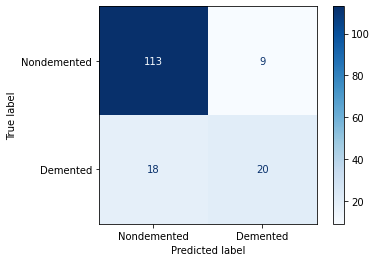

In [24]:
acc=[]
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)

# for test there are 94 cases
plot_confusion_matrix(svm, X_test_scaled, y_test, cmap= 'Blues', values_format='d', display_labels=['Nondemented', 'Demented'])

In [25]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = svm.score(X_train_scaled, y_train)*100
test_score = svm.score(X_test_scaled, y_test)*100
y_predict = svm.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)


print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, y_predict)
m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Train accuracy  84.50704225352112
Test accuracy  83.125
Test recall 0.5263157894736842
Test AUC 0.7262726488352027


Random Forest

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



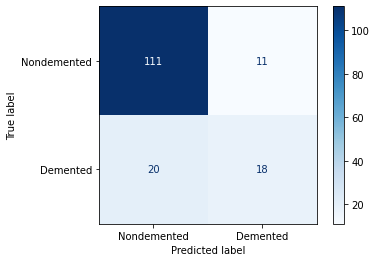

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train)

plot_confusion_matrix(rfc, X_test_scaled, y_test, cmap= 'Blues', values_format='d', display_labels=['Nondemented', 'Demented'])

In [27]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = rfc.score(X_train_scaled, y_train)*100
test_score = rfc.score(X_test_scaled, y_test)*100
y_predict = rfc.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)

print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)

Train accuracy  100.0
Test accuracy  80.625
Test recall 0.47368421052631576
Test AUC 0.6917601380500432


Optimize parameters(Finetuning) --> GridSearchCV()

In [28]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

max_features = ['auto', 'sqrt', 'log2']

max_depth = range(1,10)

criterion = ['gini']
bootstrap = [True, False]

In [29]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'bootstrap': bootstrap}

In [30]:
optimal_params = GridSearchCV(RandomForestClassifier(),
                             param_grid,
                             cv=10, # we are taking 5-fold as in k-fold cross validation
                             scoring='accuracy', # try the other scoring if have time
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 30}


In [31]:
bootstrap = optimal_params.best_params_['bootstrap']
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']
max_features = optimal_params.best_params_['max_features']
n_estimators = optimal_params.best_params_['n_estimators']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



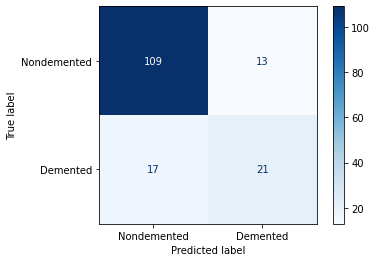

In [32]:
rfc = RandomForestClassifier(n_estimators=n_estimators, 
                             max_features=max_features, 
                             max_depth=max_depth, 
                             criterion=criterion,
                             bootstrap=bootstrap,
                             random_state=42)

rfc.fit(X_train_scaled, y_train)

# for test there are 94 cases
plot_confusion_matrix(rfc, X_test_scaled, y_test, cmap= 'Blues', values_format='d', display_labels=['Nondemented', 'Demented'])

In [33]:
acc = []
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

train_score = rfc.score(X_train_scaled, y_train)*100
test_score = rfc.score(X_test_scaled, y_test)*100
y_predict = rfc.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)
rfc_fpr, rfc_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(rfc_fpr, rfc_tpr)

print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Train accuracy  98.90453834115806
Test accuracy  81.25
Test recall 0.5526315789473685
Test AUC 0.7230371009490941


Aditional Work

In [34]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 1200, 10, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(151, 1200, 10, dtype = int))}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 80, 
                               cv = 4, verbose= 5, random_state= 101, n_jobs = -1)
model.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 142, 274, 406, 538,
                                                      671, 803, 935, 1067, 1200,
                                                      None],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [4, 6, 8, 12],
                                        'min_samples_split': [5, 7, 10, 14],
                                        'n_estimators': [151, 267, 384, 500,
                                                         617, 733, 850, 966,
                                                         1083, 1200]},
                   random_state=101, verbose=5)

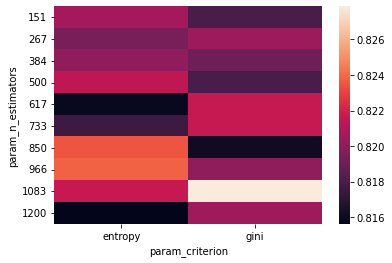

In [35]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix
predictionforest = model.best_estimator_.predict(X_test_scaled)
print(confusion_matrix(y_test,predictionforest))
print(classification_report(y_test,predictionforest))
acc3 = accuracy_score(y_test,predictionforest)

[[113   9]
 [ 19  19]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       122
           1       0.68      0.50      0.58        38

    accuracy                           0.82       160
   macro avg       0.77      0.71      0.73       160
weighted avg       0.81      0.82      0.82       160



Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()

model.fit(X_train_scaled, y_train)

print('\nCoefficient of model :', model.coef_)

print('\nIntercept of model',model.intercept_)

predict_train = model.predict(X_train_scaled)
print('\nItem_Outlet_Sales on training data',predict_train) 

rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print('\nRMSE on train dataset : ', rmse_train)

predict_test = model.predict(X_test_scaled)
print('\nItem_Outlet_Sales on test data',predict_test) 

rmse_test = mean_squared_error(y_test,predict_test)**(0.5)
print('\nRMSE on test dataset : ', rmse_test)


Coefficient of model : [ 0.07790023  0.01704007  0.10568808  0.01719927 -0.11297964 -0.08995746
 -0.10339289 -0.03174489]

Intercept of model 0.23630672926447577

Item_Outlet_Sales on training data [ 3.80208622e-01  1.80215812e-02  3.72662660e-01 -6.39803267e-02
  2.52404018e-01 -1.29828351e-01  5.23698506e-01 -4.84728739e-02
  2.01950152e-01 -1.54086509e-01  7.72007715e-02  2.72288306e-01
  1.22936241e-01  2.86550919e-01  1.02747639e-01 -5.22903018e-02
  2.17357914e-01  2.77309685e-01  1.42619562e-01  3.58050823e-01
  1.90599719e-01  1.51418327e-01  6.31324946e-02  1.66277745e-01
  1.97443437e-01  5.99514585e-01  3.64594509e-02  2.16535316e-01
  7.74853286e-02  1.21259726e-02 -9.16574670e-02  4.18743837e-01
  5.65556331e-01  4.93723354e-01  3.08041482e-01  4.16152322e-01
  4.49831786e-01  3.32436714e-02 -5.38677325e-04  2.09539824e-01
  2.53777728e-01 -5.21357011e-02  1.91145240e-01  1.36125530e-01
  1.45833974e-01  1.16531950e-01  2.97604965e-01  3.45117205e-01
  2.38721780e-01 -1.4

In [38]:
##test_score = 0

#train_score = model.score(X_train_scaled, y_train)
#test_score = model.score(X_test_scaled, y_test)
#scores = model.score(X_test_scaled, y_test)
#y_predict = model.predict(X_test_scaled)
#test_recall = recall_score(y_test, y_predict)
#fpr, tpr, thresholds = roc_curve(y_test, y_predict)
#test_auc = auc(fpr, tpr)


#print("Train accuracy ", train_score)
#print("Test accuracy ", test_score)

Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, roc_curve, auc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



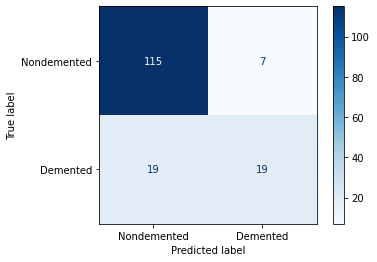

In [40]:
log_reg_model = LogisticRegression().fit(X_train_scaled, y_train)

# for test there are 94 cases
plot_confusion_matrix(log_reg_model, X_test_scaled, y_test, cmap= 'Blues', values_format='d', display_labels=['Nondemented', 'Demented'])

In [41]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

log_reg_model = LogisticRegression().fit(X_train_scaled, y_train)
train_score = log_reg_model.score(X_train_scaled, y_train)*100
test_score = log_reg_model.score(X_test_scaled, y_test)*100
scores = log_reg_model.score(X_test_scaled, y_test)
y_predict = log_reg_model.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)

print("Train accuracy ", train_score)
print("Test accuracy ", test_score)
print("Test recall", test_recall)
print("Test AUC", test_auc)
m = 'Logistic Regression (w/ imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Train accuracy  82.00312989045383
Test accuracy  83.75
Test recall 0.5
Test AUC 0.7213114754098362


Optimize parameters(Finetuning) --> GridSearchCV()

In [42]:
param_grid = {'penalty': ['l1','l2'], 
               'C': [0.001,0.01,0.1,1, 2, 3, 5, 10,100,1000]}

optimal_params = GridSearchCV(LogisticRegression(),
                             param_grid,
                             cv=5, # we are taking 5-fold as in k-fold cross validation
                             scoring='accuracy', # try the other scoring if have time
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 2, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

In [43]:
best_C = optimal_params.best_params_['C']
best_penalty = optimal_params.best_params_['penalty']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



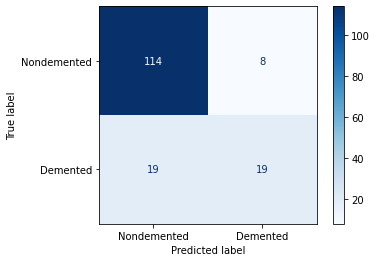

In [44]:
model = LogisticRegression(C=best_C, penalty=best_penalty).fit(X_train_scaled, y_train)

# for test there are 94 cases
plot_confusion_matrix(model, X_test_scaled, y_test, cmap= 'Blues', values_format='d', display_labels=['Nondemented', 'Demented'])

In [45]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

best_log_reg_model = LogisticRegression(C=best_C, penalty=best_penalty).fit(X_train_scaled, y_train)
train_score = best_log_reg_model.score(X_train_scaled, y_train)*100
test_score = best_log_reg_model.score(X_test_scaled, y_test)*100
y_predict = best_log_reg_model.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)*100
lgr_fpr, lgr_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(lgr_fpr, lgr_tpr)*100

print("Train accuracy with Logistec regression:", train_score)
print("Test accuracy with Logistec regression:", test_score)
print("Test recall with Logistec regression:", test_recall)
print("Test AUC with Logistec regression:", test_auc)

Train accuracy with Logistec regression: 82.00312989045383
Test accuracy with Logistec regression: 83.125
Test recall with Logistec regression: 50.0
Test AUC with Logistec regression: 71.72131147540985


Decision Tree

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



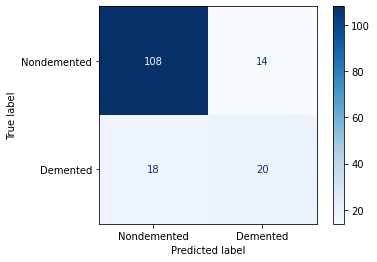

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier().fit(X_train_scaled, y_train)

# for test there are 94 cases
plot_confusion_matrix(dt_model, X_test_scaled, y_test, cmap= 'Blues', values_format='d', display_labels=['Nondemented', 'Demented'])

In [47]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

dt_model = DecisionTreeClassifier().fit(X_train_scaled, y_train)
train_score = dt_model.score(X_train_scaled, y_train)*100
test_score = dt_model.score(X_test_scaled, y_test)*100
y_predict = dt_model.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)*100
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)*100

print("Train accuracy with DecisionTreeClassifier:", train_score)
print("Test accuracy with DecisionTreeClassifier:", test_score)
print("Test recall with DecisionTreeClassifier:", test_recall)
print("Test AUC with DecisionTreeClassifier:", test_auc)
m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Train accuracy with DecisionTreeClassifier: 100.0
Test accuracy with DecisionTreeClassifier: 78.125
Test recall with DecisionTreeClassifier: 47.368421052631575
Test AUC with DecisionTreeClassifier: 67.53666954270923


Optimize parameters(Finetuning) --> GridSearchCV()

In [48]:
param_grid = {'criterion': ['gini'], 
              'max_depth': range(1,10,100)}

optimal_params = GridSearchCV(DecisionTreeClassifier(),
                             param_grid,
                             cv=5, # we are taking 5-fold as in k-fold cross validation
                             scoring='accuracy', # try the other scoring if have time
                             verbose=0,
                             n_jobs=-1)

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'criterion': 'gini', 'max_depth': 1}


In [49]:
criterion = optimal_params.best_params_['criterion']
max_depth = optimal_params.best_params_['max_depth']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



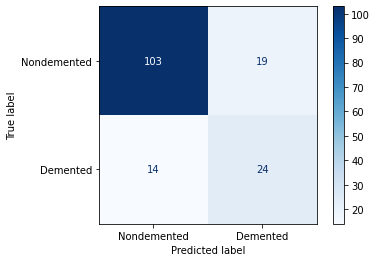

In [50]:
dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth).fit(X_train_scaled, y_train)

# for test there are 94 cases
plot_confusion_matrix(dt_model, X_test_scaled, y_test, cmap= 'Blues', values_format='d', display_labels=['Nondemented', 'Demented'])

In [51]:
train_score = 0
test_score = 0
test_recall = 0
test_auc = 0

dt_model = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth).fit(X_train_scaled, y_train)
train_score = dt_model.score(X_train_scaled, y_train)*100
test_score = dt_model.score(X_test_scaled, y_test)*100
y_predict = dt_model.predict(X_test_scaled)
test_recall = recall_score(y_test, y_predict)*100
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(dt_fpr, dt_tpr)*100

print("Train accuracy with DecisionTreeClassifier:", train_score)
print("Test accuracy with DecisionTreeClassifier:", test_score)
print("Test recall with DecisionTreeClassifier:", test_recall)
print("Test AUC with DecisionTreeClassifier:", test_auc)

Train accuracy with DecisionTreeClassifier: 78.24726134585289
Test accuracy with DecisionTreeClassifier: 79.375
Test recall with DecisionTreeClassifier: 63.1578947368421
Test AUC with DecisionTreeClassifier: 73.79206212251941


k-Nearest Neighbors

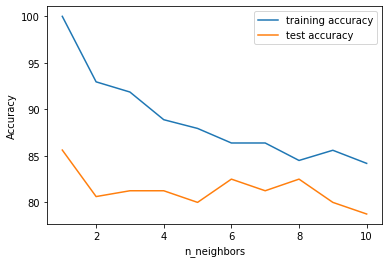

In [52]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_scaled, y_train)
    # training set accuracy
    training_accuracy.append(knn.score(X_train_scaled, y_train)*100)
    # record test set accuracy
    test_accuracy.append(knn.score(X_test_scaled, y_test)*100)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [53]:
knn=KNeighborsClassifier(n_neighbors=1)

In [54]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



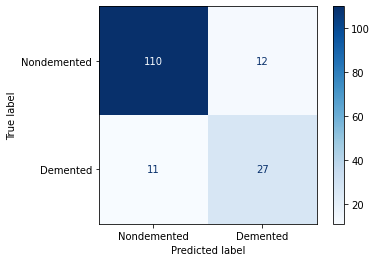

In [55]:
plot_confusion_matrix(knn, X_test_scaled, y_test, cmap= 'Blues', values_format='d', display_labels=['Nondemented', 'Demented'])

In [56]:
y_predict = knn.predict(X_test_scaled)
knn_fpr, knn_tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(knn_fpr, knn_tpr)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train_scaled, y_train)*100))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test_scaled, y_test)*100))
m = 'k-Nearest Neighbors'
acc.append([m, knn.score(X_test_scaled, y_test), test_recall, test_auc, fpr, tpr, thresholds])

Accuracy of K-NN classifier on training set: 100.00
Accuracy of K-NN classifier on test set: 85.62


Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [58]:
model = GaussianNB()

model.fit(X_train_scaled, y_train)

GaussianNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



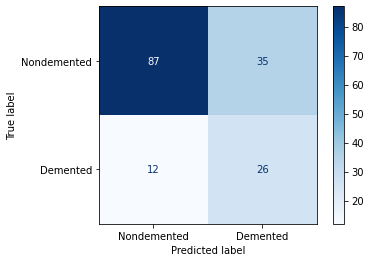

In [59]:
plot_confusion_matrix(model, X_test_scaled, y_test, cmap= 'Blues', values_format='d', display_labels=['Nondemented', 'Demented'])

In [60]:

predict_train = model.predict(X_train_scaled)
print('Target on train data',predict_train) 

accuracy_train = accuracy_score(y_train,predict_train)*100
print('accuracy_score on train dataset : ', accuracy_train)

predict_test = model.predict(X_test_scaled)
print('Target on test data',predict_test) 

accuracy_test = accuracy_score(y_test,predict_test)*100
print('accuracy_score on test dataset : ', accuracy_test)
y_predict = model.predict(X_test_scaled)

test_recall = recall_score(y_test, y_predict)*100
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
test_auc = auc(fpr, tpr)*100
model_fpr, model_tpr, thresholds = roc_curve(y_test, y_predict)
m = 'Naive Bayes'
acc.append([m, model.score(X_test_scaled, y_test), test_recall, test_auc, fpr, tpr, thresholds])

Target on train data [1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1
 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0
 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0
 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0
 0 1

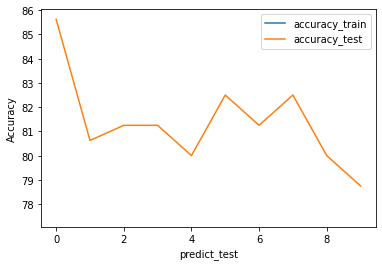

In [61]:
plt.plot( accuracy_train, label="accuracy_train")
plt.plot( test_accuracy, label="accuracy_test")
plt.ylabel("Accuracy")
plt.xlabel("predict_test")
plt.legend()
plt.savefig('model_compare_model')

Gradient Boosting Algorithms(GBA)

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)
model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



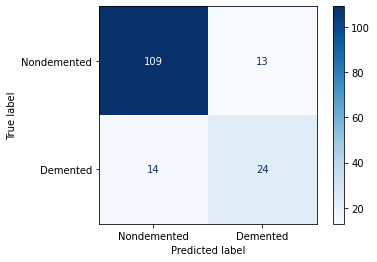

In [63]:
plot_confusion_matrix(model, X_test_scaled, y_test, cmap= 'Blues', values_format='d', display_labels=['Nondemented', 'Demented'])

In [64]:
predict_train = model.predict(X_train_scaled)
print('Target on train data',predict_train) 

accuracy_train = accuracy_score(y_train,predict_train)*100
print('accuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(X_test_scaled)
print('Target on test data',predict_test) 

# Accuracy test dataset
accuracy_test = accuracy_score(y_test,predict_test)*100

test_recall = recall_score(y_test, predict_test)*100
fpr, tpr, thresholds = roc_curve(y_test, predict_test)
test_auc = auc(fpr, tpr)*100
model_fpr, model_tpr, thresholds = roc_curve(y_test, predict_test)
m = 'Gradient Boosting Algorithms(GBA)'
acc.append([m, model.score(X_test_scaled, y_test), test_recall, test_auc, fpr, tpr, thresholds])
print('accuracy_score on test dataset : ', accuracy_test)

Target on train data [1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1
 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0

Plot ROC and compare AUC

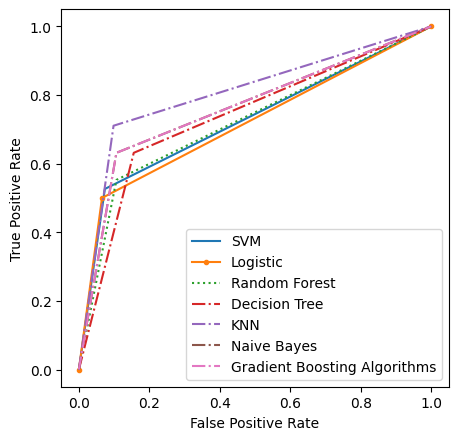

In [65]:
plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM')
plt.plot(lgr_fpr, lgr_tpr, marker='.', label='Logistic')
plt.plot(rfc_fpr, rfc_tpr, linestyle=':', label='Random Forest')
plt.plot(dt_fpr, dt_tpr, linestyle='-.', label='Decision Tree')
plt.plot(knn_fpr, knn_tpr, linestyle='-.', label='KNN')
plt.plot(model_fpr, model_tpr, linestyle='-.', label='Naive Bayes')
plt.plot(model_fpr, model_tpr, linestyle='-.', label='Gradient Boosting Algorithms')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()

In [66]:
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Random Forest,81.25000,0.552632,0.723037
1,Logistic Regression (w/ imputation),83.75000,0.500000,0.721311
2,Decision Tree,78.12500,47.368421,67.536670
3,k-Nearest Neighbors,0.85625,63.157895,0.806083
4,Naive Bayes,0.70625,68.421053,69.866264
5,Gradient Boosting Algorithms(GBA),0.83125,63.157895,76.251079
